In [1]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

In [3]:
"""1. Matrici e Norme"""
A = np.array([[1, 2], [0.499, 1.001]])

print('Norme di A:')
norm1 = np.linalg.norm(A, 1)
norm2 = np.linalg.norm(A, 2)
normfro = np.linalg.norm(A, 'fro')
norminf = np.linalg.norm(A, np.inf)

print('Norma1 =', norm1, '\n')
print('Norma2 =', norm2, '\n')
print('Normafro =', normfro, '\n')
print('Norma infinito =', norminf, '\n')

cond1 = np.linalg.cond(A, 1)
cond2 = np.linalg.cond(A, 2)
condfro = np.linalg.cond(A, 'fro')
condinf = np.linalg.cond(A, np.inf)

print('K(A)_1 =', cond1, '\n')
print('K(A)_2 =', cond2, '\n')
print('K(A)_fro =', condfro, '\n')
print('K(A)_inf =', condinf, '\n')
"""2.2 Cholesky con matrice di Hilbert"""
K_A = []
Err = []

for n in range(5, 11):
    A = scipy.linalg.hilbert(n)
    x = np.ones((n,1))
    b = A @ x
    K_A.append(np.linalg.cond(A))
    L = scipy.linalg.cholesky(A, lower=True)
    y = scipy.linalg.solve_triangular(L, b, lower=True)
    my_x = scipy.linalg.solve_triangular(L.T, y, lower=False)
    Err.append(np.linalg.norm(x - my_x, 'fro') / np.linalg.norm(x, 'fro'))

xplot = np.arange(5, 11)
plt.figure()
plt.semilogy(xplot, K_A, '-o')
plt.title('CONDIZIONAMENTO DI A')
plt.xlabel('dimensione matrice: n')
plt.ylabel('K(A)')
plt.show()

plt.figure()
plt.plot(xplot, Err, '-o')
plt.title('Errore relativo')
plt.xlabel('dimensione matrice: n')
plt.ylabel('Err= ||my_x-x||/||x||')
plt.show()

x = np.ones((2,1))
b = A @ x

btilde = np.array([[3], [1.4985]])
xtilde = np.array([[2], [0.5]])

# Verifica soluzione A xtilde = btilde
my_btilde = A @ xtilde
print('A*xtilde =', my_btilde)

deltax = np.linalg.norm(x - xtilde, 2)
deltab = np.linalg.norm(b - btilde, 2)

print('delta x =', deltax)
print('delta b =', deltab)


Norme di A:
Norma1 = 3.001 

Norma2 = 2.500200104037774 

Normafro = 2.5002003919686118 

Norma infinito = 3.0 

K(A)_1 = 3001.0000000001082 

K(A)_2 = 2083.666853410337 

K(A)_fro = 2083.6673333334084 

K(A)_inf = 3001.0000000001082 

A*xtilde = [[3.    ]
 [1.4985]]
delta x = 1.118033988749895
delta b = 0.0015000000000000568


In [5]:
"""2. Fattorizzazione LU"""
A = np.array([[3, -1, 1, -2], [0, 2, 5, -1], [1, 0, -7, 1], [0, 2, 1, 1]])
x = np.ones((4,1))
b = A @ x
condA = np.linalg.cond(A)

print('K(A) =', condA, '\n')

lu, piv = scipy.linalg.lu_factor(A)
print('LU decomposition:\n', lu, '\n')
print('Pivoting:\n', piv, '\n')

my_x = scipy.linalg.lu_solve((lu, piv), b)
print('Computed solution:\n', my_x)
print('Error norm:', np.linalg.norm(x - my_x, 'fro'))

P, L, U = scipy.linalg.lu(A)
print('P:\n', P)
print('L:\n', L)
print('U:\n', U)
print('PLU difference norm:', np.linalg.norm(A - P @ L @ U, 'fro'))

invP = np.linalg.inv(P)
y = scipy.linalg.solve_triangular(L, invP @ b, lower=True)
my_x = scipy.linalg.solve_triangular(U, y, lower=False)

print('Alternative computed solution:\n', my_x)
print('Error norm:', np.linalg.norm(x - my_x, 'fro'))

K(A) = 14.208370392921381 

LU decomposition:
 [[ 3.         -1.          1.         -2.        ]
 [ 0.          2.          5.         -1.        ]
 [ 0.33333333  0.16666667 -8.16666667  1.83333333]
 [ 0.          1.          0.48979592  1.10204082]] 

Pivoting:
 [0 1 2 3] 

Computed solution:
 [[1.]
 [1.]
 [1.]
 [1.]]
Error norm: 7.021666937153402e-16
P:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
L:
 [[1.         0.         0.         0.        ]
 [0.         1.         0.         0.        ]
 [0.33333333 0.16666667 1.         0.        ]
 [0.         1.         0.48979592 1.        ]]
U:
 [[ 3.         -1.          1.         -2.        ]
 [ 0.          2.          5.         -1.        ]
 [ 0.          0.         -8.16666667  1.83333333]
 [ 0.          0.          0.          1.10204082]]
PLU difference norm: 1.1102230246251565e-16
Alternative computed solution:
 [[1.]
 [1.]
 [1.]
 [1.]]
Error norm: 5.874748045952207e-16


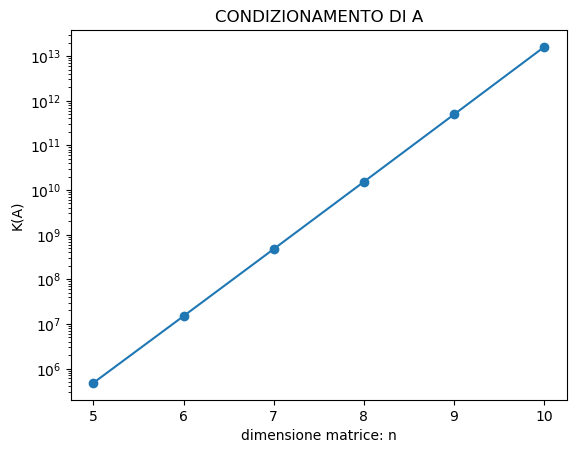

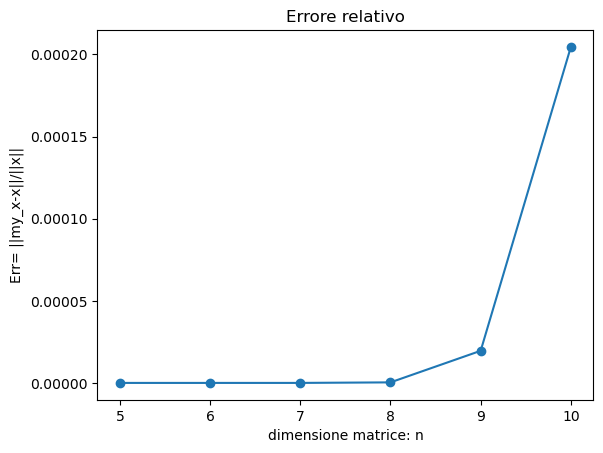

In [7]:
"""2.2 Cholesky con matrice di Hilbert"""
K_A = []
Err = []

for n in range(5, 11):
    A = scipy.linalg.hilbert(n)
    x = np.ones((n,1))
    b = A @ x
    K_A.append(np.linalg.cond(A))
    L = scipy.linalg.cholesky(A, lower=True)
    y = scipy.linalg.solve_triangular(L, b, lower=True)
    my_x = scipy.linalg.solve_triangular(L.T, y, lower=False)
    Err.append(np.linalg.norm(x - my_x, 'fro') / np.linalg.norm(x, 'fro'))

xplot = np.arange(5, 11)
plt.figure()
plt.semilogy(xplot, K_A, '-o')
plt.title('CONDIZIONAMENTO DI A')
plt.xlabel('dimensione matrice: n')
plt.ylabel('K(A)')
plt.show()

plt.figure()
plt.plot(xplot, Err, '-o')
plt.title('Errore relativo')
plt.xlabel('dimensione matrice: n')
plt.ylabel('Err= ||my_x-x||/||x||')
plt.show()
